基于train数据集，根据提供的结构，建立cnn模型，识别图片中的猫/狗，计算预测准确率：

- 识别图片中的猫/狗、计算test测试数据预测准确率
- 从网站下载猫/狗图片，对其进行预测

In [20]:
#load the data
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('./train1',target_size=(50,50),
                                                 batch_size=32,class_mode='binary')

Found 25000 images belonging to 2 classes.


In [8]:
#set up the cnn model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()
#卷积层
model.add(Conv2D(32,(3,3),input_shape=(50,50,3),activation='relu'))
#池化层
model.add(MaxPool2D(pool_size=(2,2)))
#卷积层
model.add(Conv2D(32,(3,3),input_shape=(50,50,3),activation='relu'))
#池化层
model.add(MaxPool2D(pool_size=(2,2)))
#flattening layer
model.add(Flatten())
#FC layer
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [9]:
# configure the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3872)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               495744    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [11]:
#train the model
model.fit_generator(training_set,epochs=25)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
782/782 [==============================] - 90s 115ms/step - loss: 0.5901 - accuracy: 0.6772
Epoch 2/25
782/782 [==============================] - 77s 99ms/step - loss: 0.4901 - accuracy: 0.7636
Epoch 3/25
782/782 [==============================] - 78s 99ms/step - loss: 0.4346 - accuracy: 0.7970
Epoch 4/25
782/782 [==============================] - 78s 100ms/step - loss: 0.3923 - accuracy: 0.8219
Epoch 5/25
782/782 [==============================] - 77s 99ms/step - loss: 0.3574 - accuracy: 0.8412
Epoch 6/25
782/782 [==============================] - 78s 100ms/step - loss: 0.3191 - accuracy: 0.8603
Epoch 7/25
782/782 [==============================] - 78s 99ms/step - loss: 0.2786 - accuracy: 0.8802
Epoch 8/25
782/782 [==============================] - 78s 100ms/step - loss: 0.2315 - accuracy: 0.9040
Epoch 9/25
782/782 [==============================] - 78s 100ms/step - loss: 0.1830 - accuracy: 0.9268
E

In [12]:
#accuracy on the training data
accuracy_train = model.evaluate_generator(training_set)
print(accuracy_train)

Instructions for updating:
Please use Model.evaluate, which supports generators.
[0.007809005677700043, 0.9976400136947632]


In [23]:
#accuracy on the test data
#test_set = train_datagen.flow_from_directory('./test',target_size=(50,50),
#                                                 batch_size=32,class_mode='binary')
#accuracy_test = model.evaluate_generator(test_set)
#print(accuracy_test)

In [15]:
#load single image
from keras.preprocessing.image import load_img, img_to_array
pic_dog = 'dog.jpg'
pic_dog = load_img(pic_dog,target_size=(50,50))
pic_dog = img_to_array(pic_dog)
pic_dog = pic_dog/255
pic_dog = pic_dog.reshape(1,50,50,3)
result = model.predict_classes(pic_dog)
print(result)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[1]]


In [21]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

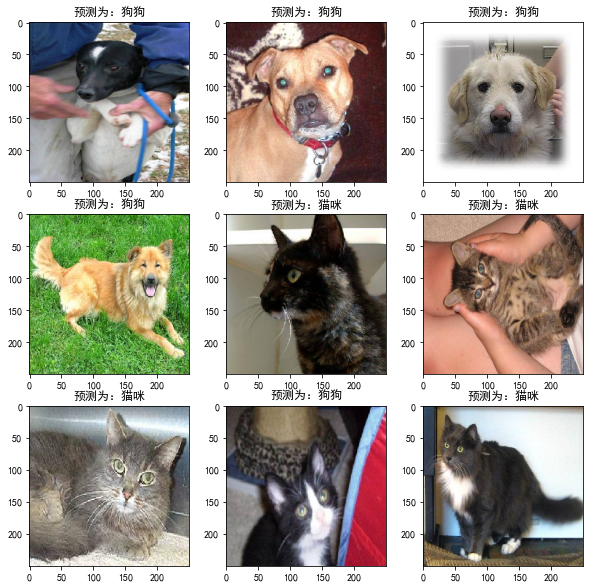

In [22]:
# make prediction on multiple images
import matplotlib as mlp
font2 = {'family' : 'SimHei',
'weight' : 'normal',
'size' : 20,
}
mlp.rcParams['font.family'] = 'SimHei'
mlp.rcParams['axes.unicode_minus'] = False
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
a = [i for i in range(1,10)]
fig = plt.figure(figsize=(10,10))
for i in a:
    img_name = str(i)+'.jpg'
    img_ori = load_img(img_name, target_size=(50,50))
    img = img_to_array(img_ori)
    img = img.astype('float32')/255
    img = img.reshape(1,50,50,3)
    result = model.predict_classes(img)
    img_ori = load_img(img_name,target_size=(250,250))
    plt.subplot(3,3,i)
    plt.imshow(img_ori)
    plt.title('预测为：狗狗' if result[0][0] == 1 else '预测为：猫咪')
plt.show()

In [ ]:
CNN实现猫狗识别实战summary:
    
- 通过搭建CNN模型，实现了对复杂图像的自动识别分类：
- 掌握了图像数据的批量加载与图像增强方法；
- 更熟练的掌握了keras的sequence结构，并嵌入卷积、池化层；
- 实现了对网络图片的分类识别
- 图像预处理参考资料：https://keras.io/preprocessing/image/